# Tests on the Face Recognition from Mugshots Database

This notebook contains the source code of the experiments presented in
> P. Contardo, P. Sernani, S. Tomassini, N. Falcionelli, M. Martarelli, P. Castellini, A.F. Dragoni, *The Face Recognition from Mugshots Database: a Dataset to Test the Use of Mugshots from Multiple Points of View for Identification*.

The paper is currently under review for the publication in the [Sensors](https://www.mdpi.com/journal/sensors) journal.

Specifically, the experiments are **accuracy tests of two different Convolutional Neural Networks (CNNs)**, pre-trained on the [VGGFace](https://www.robots.ox.ac.uk/~vgg/data/vgg_face/) and [VGGFace2](https://github.com/ox-vgg/vgg_face2) databases, on the **Face Recognition from Mugshots Database (FRMDB)**.

The FRMDB is publicly available in a dedicated GitHub repository:

>[LINK HERE](#)

Specifically, we tested VGG16 and ResNet50, using the configurations presented in

>Parkhi, O.M.; Vedaldi, A.; Zisserman, A. Deep face recognition. British Machine Vision Association 2015. [PDF](https://www.robots.ox.ac.uk/~vgg/publications/2015/Parkhi15/parkhi15.pdf)

for **VGG16**, and in 

>Cao, Q.; Shen, L.; Xie, W.; Parkhi, O.M.; Zisserman, A. VGGFace2: A Dataset for Recognising Faces across Pose and Age. In Proceedings of the 2018 13th IEEE International Conference on Automatic Face & Gesture Recognition (FG 2018), 2018, pp. 67–74. [PDF](https://www.robots.ox.ac.uk/~vgg/publications/2018/Cao18/cao18.pdf)

for **ResNet50**. Instead of running again the training on VGG16 and ResNet50, we used the weights and the models available in

><https://github.com/rcmalli/keras-vggface>

Such repository includes the Keras conversion of the original CAFFE networks and weights.

## 1 Preliminary Operations

The following cells:
- Import OpenCV, OS and Numpy.
- Define the **function to load the dataset** for the experiments, from a directory which contains a subdirectory for each subject.
- **Download the dataset** from its GitHub repository.
- Load the dataset for training and test and **save the loaded numpy array**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np

In [ ]:
def load_dataset(mainDir, resizeDim=(224, 224), savePath=None):
	"""Extracts the images from a directory which contains a directory for each 
		subject, including all the subject faces.

	Parameters
	----------
	mainDir : str
						Path of the dataset. The dataset should contain a directory for each
						subject, with all the images of that subject.
	resizeDim : tuple of int
							2D to be used for face resize.
	savePath : str
						 Path of the directory where the loaded numpy arrays (images + 
						 labels) should be saved. If None, the numpy arrays are not saved on
						 disk.

	Returns
	-------
	X : ndarray
			Array of face images
	y :	ndarray
			Array of image labels
	z : ndarray
			Array of image pose/cam 
	"""

	X = list()
	y = list()
	z = list()

	for subject in os.listdir(mainDir):
		path = os.path.join(mainDir, subject)
		for filename in os.listdir(path):
			filepath = os.path.join(path, filename)
	 		
			face = cv2.imread(filepath)
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, resizeDim)
			
			label = subject

			filename = filename.split('.')[0]
			pose = filename.split('_')[1]

			#print('Extracting...', filepath, label)

			z.append(pose)
			y.append(label)
			X.append(face)
	
	X = np.asarray(X)
	y = np.asarray(y)
	z = np.asarray(z)

	if savePath:
		np.savez_compressed(savePath, arr_0=X, arr_1=y, arr_2=z)
	return X, y, z

In [ ]:
!wget https://univpm-my.sharepoint.com/:u:/g/personal/p007062_staff_univpm_it/ERb0KnyhHkJOj9E16opALNkBMtuiHK0h0Jv-Rkfk6yRLPw?download=1 -O fotosegnalamento.zip

--2022-08-18 15:27:03--  https://univpm-my.sharepoint.com/:u:/g/personal/p007062_staff_univpm_it/ERb0KnyhHkJOj9E16opALNkBMtuiHK0h0Jv-Rkfk6yRLPw?download=1
Resolving univpm-my.sharepoint.com (univpm-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to univpm-my.sharepoint.com (univpm-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/p007062_staff_univpm_it/Documents/ViolenceDetectionDatasets/cropped-photosignalling.zip?ga=1 [following]
--2022-08-18 15:27:05--  https://univpm-my.sharepoint.com/personal/p007062_staff_univpm_it/Documents/ViolenceDetectionDatasets/cropped-photosignalling.zip?ga=1
Reusing existing connection to univpm-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 181556210 (173M) [application/x-zip-compressed]
Saving to: ‘fotosegnalamento.zip’

fotosegnalamento.zi 100%[===================>] 173.14M  37.5MB/s    in 8.6s    

2022-08-18 15:27:14 (20.2 MB/s) - ‘fotos

In [ ]:
!unzip fotosegnalamento.zip -d /content

Archive:  fotosegnalamento.zip
   creating: /content/cropped-photosignalling/
   creating: /content/cropped-photosignalling/001/
  inflating: /content/cropped-photosignalling/001/Img_01.png  
  inflating: /content/cropped-photosignalling/001/Img_02.png  
  inflating: /content/cropped-photosignalling/001/Img_03.png  
  inflating: /content/cropped-photosignalling/001/Img_04.png  
  inflating: /content/cropped-photosignalling/001/Img_11.png  
  inflating: /content/cropped-photosignalling/001/Img_12.png  
  inflating: /content/cropped-photosignalling/001/Img_13.png  
  inflating: /content/cropped-photosignalling/001/Img_14.png  
  inflating: /content/cropped-photosignalling/001/Img_21.png  
  inflating: /content/cropped-photosignalling/001/Img_22.png  
  inflating: /content/cropped-photosignalling/001/Img_23.png  
  inflating: /content/cropped-photosignalling/001/Img_24.png  
  inflating: /content/cropped-photosignalling/001/Img_31.png  
  inflating: /content/cropped-photosignalling/001/Im

In [ ]:
!wget https://univpm-my.sharepoint.com/:u:/g/personal/p007062_staff_univpm_it/EefiHL56djhLsQJ7QPCnTtoBqt67qpT9fS5nIIEVHw4_vw?download=1 -O security.zip

--2022-08-18 15:27:17--  https://univpm-my.sharepoint.com/:u:/g/personal/p007062_staff_univpm_it/EefiHL56djhLsQJ7QPCnTtoBqt67qpT9fS5nIIEVHw4_vw?download=1
Resolving univpm-my.sharepoint.com (univpm-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to univpm-my.sharepoint.com (univpm-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/p007062_staff_univpm_it/Documents/ViolenceDetectionDatasets/cropped-security-faces.zip?ga=1 [following]
--2022-08-18 15:27:19--  https://univpm-my.sharepoint.com/personal/p007062_staff_univpm_it/Documents/ViolenceDetectionDatasets/cropped-security-faces.zip?ga=1
Reusing existing connection to univpm-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 5897707 (5.6M) [application/x-zip-compressed]
Saving to: ‘security.zip’

security.zip        100%[===================>]   5.62M  1.81MB/s    in 3.1s    

2022-08-18 15:27:23 (1.81 MB/s) - ‘security.zip’ sav

In [ ]:
!unzip security.zip -d /content

Archive:  security.zip
   creating: /content/cropped-security-faces/
   creating: /content/cropped-security-faces/001/
  inflating: /content/cropped-security-faces/001/Img_01.png  
  inflating: /content/cropped-security-faces/001/Img_02.png  
  inflating: /content/cropped-security-faces/001/Img_03.png  
  inflating: /content/cropped-security-faces/001/Img_04.png  
  inflating: /content/cropped-security-faces/001/Img_05.png  
   creating: /content/cropped-security-faces/002/
  inflating: /content/cropped-security-faces/002/Img_01.png  
  inflating: /content/cropped-security-faces/002/Img_02.png  
 extracting: /content/cropped-security-faces/002/Img_03.png  
  inflating: /content/cropped-security-faces/002/Img_04.png  
  inflating: /content/cropped-security-faces/002/Img_05.png  
   creating: /content/cropped-security-faces/003/
  inflating: /content/cropped-security-faces/003/Img_01.png  
  inflating: /content/cropped-security-faces/003/Img_02.png  
  inflating: /content/cropped-securit

In [ ]:
load_dataset('/content/cropped-photosignalling', (224, 224), '/content/photosignalling.npz')

(array([[[[ 26,  20,  22],
          [ 26,  20,  22],
          [ 26,  20,  22],
          ...,
          [ 37,  27,  25],
          [ 37,  27,  25],
          [ 37,  27,  25]],
 
         [[ 26,  20,  22],
          [ 26,  20,  22],
          [ 26,  20,  22],
          ...,
          [ 36,  26,  25],
          [ 35,  25,  24],
          [ 35,  25,  24]],
 
         [[ 27,  21,  23],
          [ 27,  21,  23],
          [ 26,  20,  22],
          ...,
          [ 32,  23,  21],
          [ 31,  22,  20],
          [ 31,  21,  20]],
 
         ...,
 
         [[215,  65,  94],
          [210,  61,  89],
          [215,  66,  95],
          ...,
          [245, 225, 211],
          [251, 233, 217],
          [254, 237, 219]],
 
         [[230,  77, 105],
          [215,  62,  90],
          [209,  59,  86],
          ...,
          [231, 210, 192],
          [240, 222, 204],
          [249, 232, 212]],
 
         [[239,  85, 114],
          [229,  76, 105],
          [212,  62,  90],
   

In [ ]:
load_dataset('/content/cropped-security-faces', (224, 224), '/content/security.npz')

(array([[[[206, 201, 198],
          [197, 192, 189],
          [187, 182, 179],
          ...,
          [225, 223, 224],
          [224, 222, 223],
          [223, 221, 222]],
 
         [[179, 174, 171],
          [197, 191, 188],
          [205, 200, 197],
          ...,
          [226, 224, 225],
          [225, 223, 224],
          [223, 222, 223]],
 
         [[179, 175, 171],
          [200, 194, 192],
          [212, 207, 204],
          ...,
          [225, 223, 224],
          [224, 222, 223],
          [223, 221, 222]],
 
         ...,
 
         [[  8,   6,  20],
          [  9,   7,  22],
          [  9,   7,  23],
          ...,
          [ 95,  79,  81],
          [108,  91,  93],
          [110,  92,  94]],
 
         [[  9,   7,  21],
          [ 10,   8,  23],
          [ 11,   8,  24],
          ...,
          [ 89,  75,  75],
          [ 97,  81,  82],
          [109,  93,  92]],
 
         [[  9,   7,  21],
          [ 10,   8,  21],
          [ 11,   8,  22],
   

## 2 Embedding Extraction

The following cells
- Download the **keras-vggface repository** with the **Keras porting** of the original CAFFE implementations **of VGG16 and ResNet50** architectures and weights. To ensure that the code is **compatible** with the **latest Keras and Tensorflow** implementations each occurrence of '*keras.engine.topology*' is replaced with '*tensorflow.keras.utils*'.
- **Print the version** of Keras, Tensorflow and Scikit-learn used when running the notebook. The code also prints the GPU, if used.
- Define the **utility functions to compute the embeddings** of the face images included in a given dataset
- **Compute the embeddings** of the training and test face images.

In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-1sbrcfmy
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-1sbrcfmy
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=01a6394ff070d3b6c19826b037e7701915de629984bc262ce60c4a07c90f99ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-4j7w9x1_/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.6 MB/s 


20951

In [ ]:
import tensorflow as tf
from tensorflow.keras import __version__
import sklearn

print('Using Keras version:', __version__)

device_name = tf.test.gpu_device_name()
if device_name == '':
    device_name = "None"
print('Using TensorFlow version:', tf.__version__, ', GPU:', device_name)

print('The scikit-learn version is {}.'.format(sklearn.__version__))

Using Keras version: 2.8.0
Using TensorFlow version: 2.8.2 , GPU: None
The scikit-learn version is 1.0.2.


In [ ]:
import time
import tensorflow as tf

from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

def get_embedding(model, sample, preprocessing_v):
  """ Extracts a face embedding from a face image

	Parameters
	----------
	model : Sequential
						Trained model to infer the embedding
	sample : tuple of int
					 A (224, 224, 3) face image.
  preprocessing_v : int
                    Version of preprocess function to be used. 1 for the VGG16
                    preprocessing, 2 for the ResNet50/SeNet50 preprocessing.

	Returns
	-------
	embedding: ndarray
             Prediction over the sample. The shape varies according to the 
             model: 
              - a (2048,) array with ResNet50 and SeNet50
              - a (512,) array with VGG16
	"""
  sample = sample.astype('float32')
  samples = np.expand_dims(sample, axis=0)
  samples = preprocess_input(samples, version=preprocessing_v)	
  yhat = model.predict(samples)
  return yhat[0]



def compute_embeddings(modelName, dataPath, savePath=None, verbose=False):
  """ Computes the face embeddings for a dataset.

	Parameters
	----------
	modelName : str
              Name of the model to be used to infer embeddings. One between 
              'resnet50', 'vgg16', and 'senet50'.
	dataPath : str
             Path to the compressed numpy array of the dataset. The array should
             contain the samples ('arr_0'), the labels ('arr_1'), and the pose of
             each image ('arr_2')
  savePath : str
             Path to store the numpy array of the embeddings.
  verbose : bool
            If True, prints the model summary and execution time.
  """
  data = np.load(dataPath)
  X, y, z = data['arr_0'], data['arr_1'], data['arr_2']
  model = VGGFace(model=modelName, include_top=False, input_shape=(224, 224, 3), pooling='avg')
  if verbose:
    model.summary()
  embeddings = list()
  t0 = time.time()

  preprocess_version = 2
  if modelName == 'vgg16':
    preprocess_version = 1

  for sample in X:
    embedding = get_embedding(model, sample, preprocess_version)
    if embeddings is np.ndarray:
      print('numpy array')
    embeddings.append(embedding)
  embeddings = np.asarray(embeddings)

  t1 = time.time()
  if verbose:
    print('Time:', t1-t0, 's, for', X.shape[0], 'images.')
  if savePath:
    np.savez_compressed(savePath, arr_0=embeddings, arr_1=y, arr_2=z)

In [ ]:
# computing embeddings for mughosts with ResNet50
compute_embeddings('resnet50', '/content/photosignalling.npz', '/content/embeddings-resnet-photosignalling.npz', True)

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

In [ ]:
# computing embeddings for security cams with ResNet50
compute_embeddings('resnet50', '/content/security.npz', '/content/embeddings-resnet-security.npz', True)

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

In [ ]:
# computing embeddings for mugshots with VGG16
compute_embeddings('vgg16', '/content/photosignalling.npz', '/content/embeddings-vgg16-photosignalling.npz', True)

58909280/58909280 [==============================] - 5s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                      

In [ ]:
# computing embeddings for security cams with VGG16
compute_embeddings('vgg16', '/content/security.npz', '/content/embeddings-vgg16-security.npz', True)

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
# computing embeddings for mugshots with SeNet50
compute_embeddings('senet50', '/content/photosignalling.npz', '/content/embeddings-senet50-photosignalling.npz', True)

104944616/104944616 [==============================] - 16s 0us/step
Model: "vggface_senet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)         

In [ ]:
# computing embeddings for security cams with SeNet50
compute_embeddings('senet50', '/content/security.npz', '/content/embeddings-senet50-security.npz', True)

In [ ]:
#!cp /content/embeddings-resnet-photosignalling.npz /content/drive/MyDrive/ViolenceDetectionDatasets/
#!cp /content/embeddings-resnet-security.npz /content/drive/MyDrive/ViolenceDetectionDatasets/
!cp /content/embeddings-vgg16-photosignalling.npz /content/drive/MyDrive/ViolenceDetectionDatasets/
!cp /content/embeddings-vgg16-security.npz /content/drive/MyDrive/ViolenceDetectionDatasets/
#!cp /content/embeddings-senet50-photosignalling.npz /content/drive/MyDrive/ViolenceDetectionDatasets/
#!cp /content/embeddings-senet50-security.npz /content/drive/MyDrive/ViolenceDetectionDatasets/

## 3 Experiments

The following cells:
- **Define the functions** to load the samples from saved numpy arrays, compute the test metrics, run the tests, and show the results.
- **Run the tests**.

The tests **compares** the embedding of the faces of each subject in the **security cameras** with different **set of mugshots** available in the FRMDB. Specifically, there are **8 different tests** to identify the subjects in the security camera images
- *Test F*, using the **frontal mugshot** (33, according to the code used in the FRMDB) of each subject for the comparison.
- *Test F-L1-R1*, using the **frontal** mugshot (33) and the mugshots **to the left and to the right of the frontal** (i.e., 23 and 43).
- *Test 1*, using the **frontal** mugshot (33) and **the right profile** (53) of each subject.
- *Test 2*, using the **frontal** mugshot (33), the **right** profile (53), and the **left** profle (13) of each subject.
- *Test 3*, using the mugshots of the ***Test F-L1-R1*** and ***Test 2*** (i.e., 13, 23, 33, 43, 53)
- *Test 4*, adding the images with **highest left** (03) and **right** (63) angles to ***Test 3***.
- *Test 5*, which adds **all the images 30° above the subject** (i.e., 02, 12, 22, 32, 42, 52, 62) to the mugshots of ***Test 4***.
- *Test 6*, which uses **all the 28 mugshots** available for each subject in the FRMDB.

The following table lists all the mugshot available in each test for each subject as a couple (*h*, *v*) where *h* is the angle from which the mugshot was taken on the horizontal plane, and *v* is the angle on the vertical plane.

| **Test**     | **Mugshots**                                                                                                                                                                                                                                                                                                                                                        |
|:-------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Test F       | (0°, 0°)                                                                                                                                                                                                                                                                                                                                                            |
| Test F-L1-R1 | (0°, 0°), (-45°, 0°), (45°, 0°)                                                                                                                                                                                                                                                                                                                                     |
| Test 1       | (0°, 0°), (90°, 0°)                                                                                                                                                                                                                                                                                                                                                 |
| Test 2       | (0°, 0°), (90°, 0°), (-90°, 0°)                                                                                                                                                                                                                                                                                                                                     |
| Test 3       | (0°, 0°), (90°, 0°), (-90°, 0°), (45°, 0°), (45°, 0°)                                                                                                                                                                                                                                                                                                               |
| Test 4       | (0°, 0°), (135°, 0°), (-135°, 0°), (90°, 0°), (-90°, 0°), (45°, 0°), (45°, 0°)                                                                                                                                                                                                                                                                                      |
| Test 5       | (0°, 0°), (135°, 0°), (-135°, 0°), (90°, 0°), (-90°, 0°), (45°, 0°), (45°, 0°), (0°, 30°), (135°, 30°), (-135°, 30°),<br/>(90°, 30°), (-90°, 30°), (45°, 30°), (45°, 30°)                                                                                                                                                                                           |
| Test 6       | (0°, 0°), (135°, 0°), (-135°, 0°), (90°, 0°), (-90°, 0°), (45°, 0°), (45°, 0°), (0°, 30°), (135°, 30°), (-135°, 30°),<br/> (90°, 30°), (-90°, 30°), (45°, 30°), (45°, 30°), (0°, 60°), (135°, 60°), (-135°, 60°), (90°, 60°), (-90°, 60°), (45°, 60°),<br/>(45°, 60°), (0°, -30°), (135°, -30°), (-135°, -30°), (90°, -30°), (-90°, -30°), (45°, -30°), (45°, -30°) |


For each test, we measured the capability of VGG16 and ResNet50 to identify the subject in each image from the security cameras, by registering if **the subject** was **included** in the **top-1**, **top-3**, **top-5**, and **top-10 most similar mugshots**, and in the **top-1**, **top-3**, **top-5**, and **top-10 nearest identities**. To evaluate the similarity between a face in a mugshot and a face in the image from a security camera, we use the **Euclidean distance** as the similarity measure between the **two face embeddings**. Given such similarity criterion, we measure the accuracy as follows:
- For the **most similar identities**, we compute the accuracy as the **number of security camera images** for which the **correct subject** was in the **top-1**, **top-3**, **top-5**, and **top-10** nearest identities **over the total** number of security camera images.
- For the **most similar mugshots**, we compute the accuracy as the **number of security camera images** for which the **correct subject** was in the **top-1**, **top-3**, **top-5**, and **top-10** most similar mugshots **over the total** number of security camera images.
Obviously, the top-1 identity and the top-1 mugshot overlap.


In [ ]:
!cp /content/drive/MyDrive/ViolenceDetectionDatasets/embeddings-vgg16-photosignalling.npz /content/
!cp /content/drive/MyDrive/ViolenceDetectionDatasets/embeddings-vgg16-security.npz /content/

cp: cannot stat '/content/drive/MyDrive/ViolenceDetectionDatasets/embeddings-vgg16-photosignalling.npz': No such file or directory
cp: cannot stat '/content/drive/MyDrive/ViolenceDetectionDatasets/embeddings-vgg16-security.npz': No such file or directory


In [ ]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
#from sklearn.svm import SVC
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import StratifiedKFold
#from sklearn.svm import LinearSVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.manifold import TSNE
from scipy.spatial import distance as dist
import copy
import matplotlib.pyplot as plt

In [ ]:
def load_dataset_dictionaries(photosignallingPath, securityPath, normalize=True, verbose=False):
  """ Puts the embeddings in the datasets at photosignallingPath (the mugshots)
  and at securityPath (security cams) into two dictonaries where the keys are
  the subject identity ('001', '002', ...), the pose ('01', '02, ..., '33', ...,
  '63') for the mughshots and the cam ('01', ..., '05').

  Parameters
  ----------

  photosignallingPath : str
                        Path to the compressed numpy array of the mughshot
                        dataset. The array should contain the samples ('arr_0'),
                        the labels ('arr_1'), and the pose of each image ('arr_2')
  securityPath : str
                        Path to the compressed numpy array of the security cam
                        dataset. The array should contain the samples ('arr_0'),
                        the labels ('arr_1'), and the cam of each image ('arr_2')
  normalize : bool
              If True, embeddings are normalized with L2 norm
  
  verbose : bool
            If True, prints the number of the elements in the list of embeddings
            labels, and poses/cams loaded from the datasets

  Returns

  photoDict : dictionary
              Contains the mugshot embeddings {identity: {pose: embedding}},
              where an embedding is a ndarray of float32
  
  secDict : dictionary
            Contains the security cam embeddings {identity: {ca: embedding}},
            where an embedding is a ndarray of float32

  """
  photosignallingData = np.load(photosignallingPath)
  securityData = np.load(securityPath)
  photoEmb, photoLabel, photoCam = photosignallingData['arr_0'], photosignallingData['arr_1'], photosignallingData['arr_2']
  secEmb, secLabel, secCam = securityData['arr_0'], securityData['arr_1'], securityData['arr_2']
  in_encoder = Normalizer(norm='l2')
  if normalize: 
    photoEmb = in_encoder.transform(photoEmb)
    secEmb = in_encoder.transform(secEmb)

  if verbose:
    print('Photosignalling shapes: ', photoEmb.shape, photoLabel.shape, photoCam.shape)
    print('Security shapes: ', secEmb.shape, secLabel.shape, secCam.shape)

  photoLabEmbCam = zip(photoLabel, photoEmb, photoCam)
  photoLabEmbCam = sorted(photoLabEmbCam, key=lambda item: (item[0], item[2]))
  photoLabel = [label for label, emb, cam in photoLabEmbCam]
  photoEmb = [emb for label, emb, cam in photoLabEmbCam]
  photoCam = [cam for label, emb, cam in photoLabEmbCam]

  secLabEmbCam = zip(secLabel, secEmb, secCam)
  secLabEmbCam = sorted(secLabEmbCam, key=lambda item: (item[0], item[2]))
  secLabel = [label for label, emb, cam in secLabEmbCam]
  secEmb = [emb for label, emb, cam in secLabEmbCam]
  secCam = [cam for label, emb, cam in secLabEmbCam]

  photoDict = {}
  for label, emb, cam in photoLabEmbCam:
    if label not in photoDict:
      photoDict[label] = {}
    photoDict[label][cam] = emb

  secDict = {}
  for label, emb, cam in secLabEmbCam:
    if label not in secDict:
      secDict[label] = {}
    secDict[label][cam] = emb
  
  return photoDict, secDict


In [ ]:
def distanceRank(embeddingCam, mughshotsDict):
  """ Computes the Euclidean distance between the embedding "embeddingCam" and 
  all the embeddings in the dictionary mugshotsDict.

  Parameters
  ----------

  embeddingCam : ndarray of float32
                 Embedding of a face in a security cam
    
  mughshotsDict : dictionary
                  Contains the mugshot embeddings {identity: {pose: embedding}},
                  where an embedding is a ndarray of float32
  
  Returns
  -------
  distance_list : list
                  Sorted list of tuple (distance, identity), where the distance
                  is the Euclidean distance between the embeddingCam and an
                  embedding of such identity.
  """
  distance_list = list()
  for identity in mughshotsDict:
    for pose in mughshotsDict[identity]:
      distance = dist.euclidean(embeddingCam, mughshotsDict[identity][pose])
      dist_label = (distance, identity)
      distance_list.append(dist_label)
  return sorted(distance_list)

def filterMugshotDictByPoseList(mughshotsDict, poseList):
  """ Filters the mugshot dictionary according to the list of poses to be
  considered.

  Parameters
  ----------
  mugshotsDict : dictionary
                 Contains the mugshot embeddings {identity: {pose: embedding}},
                 where an embedding is a ndarray of float32
  
  poseList : list
             List of the different pose to be loaded from the dictionary. A pose
             is a string 'XY' where X denotes the horizontal angle (from 0 = left,
             to 6 = right) and Y the vertical angle (from 1 = up to 4 = bottom),
             according to the specifications of the FRMDB dataset.
  
  Returns
  -------

  labemb : dictionary
           Contains the selected mugshot embeddings {identity: {pose: embedding}},
           where an embedding is a ndarray of float32

  identity_deleted : list
                     List of the identities (strings with the identiy code)
                     deleted because they do not contain the poses the users looked
                     for (this list is empty in most of the cases).
  """
  labemb = {}
  labemb = copy.deepcopy(mughshotsDict)
  identity_deleted = list()
  for identity in mughshotsDict:
    allPoseDetected = True
    for pose in poseList:
      if pose not in mughshotsDict[identity]:
        allPoseDetected = False
    if allPoseDetected:
      for pose in mughshotsDict[identity]:
        if pose not in poseList:
          labemb[identity].pop(pose)
    else:
      del labemb[identity]
      identity_deleted.append(identity)
      print('identity ', identity, ' removed because some of the pose are not available')
  return labemb, identity_deleted

def filterSecurityCamsByCamList(securityDict, camList, identity_deleted):
  """ Filters the security cams dictionary according to the list of cams to be
  considered and the deleted identities (in case some identities were removed
  from the mugshots dictionary)

  Parameters
  ----------
  securityDict : dictionary
                 Contains the security cam embeddings {identity: {cam: embedding}},
                 where an embedding is a ndarray of float32
  
  camList : list
            List of the different cam to be loaded from the dictionary. A cam
            is a string 'X' from '1' to '5'.
  identity_deleted : list
                     List of the identities (string with the identiy code) deleted
                     from the mugshots deleted because they do not contain the poses
                     the users looked for (this list is empty in most of the cases).
                     Such identitis will be removed from the securityDict as well.
  
  Returns
  -------

  labemb : dictionary
           Contains the selected cams embeddings {identity: {cam: embedding}},
           where an embedding is a ndarray of float32
  """
  labemb = {}
  labemb = copy.deepcopy(securityDict) 
  for identity in securityDict:
    if identity in identity_deleted:
      labemb.pop(identity)
    else:
      for cam in securityDict[identity]:
        if cam not in camList:
          labemb[identity].pop(cam)
  return labemb

# funzione di filtraggio per utilizzare contemporaneamente i due dizionari
def filterDicts(labemb_mug_dict,labemb_cam_dict, poseList,camList):
  """ Filters the mugshots and the security cams dictionary according to the
  specifications of filterMugshotDictByPoseList and filterSecurityCamsByCamList.

  Parameters
  ----------
  labemb_mug_dict : dictionary
                    Contains the mugshot embeddings {identity: {pose: embedding}},
                    where an embedding is a ndarray of float32

  labemb_cam_dict : dictionary
                    Contains the security cam embeddings {identity: {cam: embedding}},
                    where an embedding is a ndarray of float32

  poseList : list
             List of the different poses to be loaded from the dictionary. A pose
             is a string 'XY' where X denotes the horizontal angle (from 0 = left,
             to 6 = right) and Y the vertical angle (from 1 = up to 4 = bottom),
             according to the specifications of the FRMDB dataset.
  
  camList : list
            List of the different cam to be loaded from the dictionary. A cam
            is a string 'X' from '1' to '5'.
  
  Returns
  -------
  filteredMug : dictionary
                Contains the selected mugshot embeddings {identity: {pose: embedding}},
                where an embedding is a ndarray of float32

  filteredCam : dictionary
                Contains the selected cams embeddings {identity: {cam: embedding}},
                where an embedding is a ndarray of float32
  """
  filteredMug, identity_deleted = filterMugshotDictByPoseList(labemb_mug_dict, poseList)
  filteredCam = filterSecurityCamsByCamList(labemb_cam_dict, camList, identity_deleted)
  return filteredMug, filteredCam


In [ ]:
def test(mugshotDict, securityDict, poseList, camList):
  """ Computes the ranking of the nearest identities and mugshots comparing the
  security cams embeddings with those of the mugshots.

  Parameters
  ----------
  mugshotDict : dictionary
                Contains the mugshot embeddings {identity: {pose: embedding}},
                where an embedding is a ndarray of float32

  securityDict : dictionary
                 Contains the security cam embeddings {identity: {cam: embedding}},
                 where an embedding is a ndarray of float32

  poseList : list
             List of the different pose to be loaded from the dictionary. A pose
             is a string 'XY' where X denotes the horizontal angle (from 0 = left,
             to 6 = right) and Y the vertical angle (from 1 = up to 4 = bottom),
             according to the specifications of the FRMDB dataset.
  
  camList : list
            List of the different cam to be loaded from the dictionary. A cam
            is a string 'X' from '1' to '5'.
  
  Returns
  -------
  listRankId : list
               List of int corresponding to the position of the first correct identity
               in the ranking of the nearest identities of each security face image

  listRankImg : list
                List of int corresponding to the position of the first correct mugshot
                in the ranking of the nearest mugshots for each security face image
  
  result : list
           list of lists of tuples (distance, identity), where the distance
           is the Euclidean distance between the embeddingCam and an
           embedding of such identity. Each tuple list correspond to a camera in the 
           security camera images and is ordered for ascending distance. Each tuple 
           list of the nearest mugshots for each camera (from which the list of
           the nearest identities can be derived)

  labelResult : list
                list of the identities (strings) available in the dictionary of
                security cams.
  """    
  filteredMug, filteredCam = filterDicts(mugshotDict, securityDict, poseList, camList)

  result = list()
  labelResult = list()
  for identity in filteredCam:
    for cam in filteredCam[identity]:
      sample = filteredCam[identity][cam]
      result.append(distanceRank(sample, filteredMug))
      labelResult.append(identity)


  listRankImg = list() # nearest mugshots ranking  
  listRankId = list() # nearest identities ranking
  for i in range(len(result)):
    i_rank = result[i]
    i_label = labelResult[i]
    betterId = set()
    for j in range(len(i_rank)):
      id = i_rank[j][1]
      if id == i_label:
        listRankId.append(len(betterId))
        listRankImg.append(j)
        break;
      else:
        betterId.add(id)
  return listRankId, listRankImg, result, labelResult

def TopN(listRank, N):
  """ Computes the percentage of images for which the correct result is in the
  first N nearest results (identities or mugshots)

  Parameters
  ----------
  listRank :  List of int corresponding to the position of the first correct result
              (i.e., the first correct identity or mugshot)

  N : int
      Position whitin which the correct result should place
  
  Returns
  -------

  countPercentage : float
                    Number between 0 and 1 representing the portion of security
                    cam images for which the correct result is within the first
                    N nearest results.
  """ 
  count = 0
  for item in listRank:
    if item < N:
      count = count+1
  countPercentage = count/len(listRank)
  return countPercentage

In [ ]:
def plot_histograms(id_bars, img_bars, decimals, labels, title, filename):
    """ Plots the experiment results.

    Paramters
    ---------

    id_bars : list
             List of float numbers representing the percentage of nearest identities
             in the correct position for each test.
    
    img_bars : list
               List of float numbers representing the percentage of nearest mugshots
               in the correct position for each test.
    
    decimals : int
               Number of decimals to which the results should be rounded.
    
    labels : list
             List of labels for x-axis (there should be a label for each test).
    
    title : str
            The plot title.
    
    filename : str
               Path to save the plot. If None the plot is just shown, but not saved.
    """
    if decimals > 0:
      id_bars = [round(val, decimals) for val in id_bars]
      img_bars = [round(val, decimals) for val in img_bars]
    fig_size = [22,10]
    title_size = 24
    data_size = 26

    x_pos = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=fig_size)
    plt.ylim(0, 111)
    ax.bar(x_pos - width/2, id_bars, width, label='Identities', zorder=3)
    ax.bar(x_pos + width/2, img_bars, width, label='Mugshots', zorder=3)

    #ax.set_ylabel('%', fontsize=title_size + 2, rotation='horizontal')
    #ax.set_title('Accuracy on Binary Dataset', fontsize=title_size)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, fontsize=data_size - 2)
    ax.set_yticks([0, 20, 40, 60, 80, 100])
    ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=data_size-2)
    ax.legend(loc='lower right', fontsize=data_size - 2)
    ax.grid(b=True, axis='y', zorder=0)
    plt.ylabel('Accuracy [%]', fontsize=data_size - 2)
    plt.title(title, fontsize=data_size)

    for i in range(len(labels)):  
        plt.text(i-0.2, id_bars[i] + 1, str(id_bars[i]), ha = 'center', fontsize=data_size - 2, zorder=3)
        plt.text(i+0.2, img_bars[i] + 1, str(img_bars[i]), ha = 'center', fontsize=data_size - 2, zorder=3)

    fig.tight_layout()

    plt.savefig(filename, transparent=True)

    plt.show()

def run_test(mugshotsPath, securityPath, normalize, tops, poseList, testLabel, verbose):
  """ Runs a test on the FRMDB dataset.

  Paramters
  ---------

  mugshotsPath : str
                 Path to the compressed numpy array of the mughshot
                 dataset. The array should contain the samples ('arr_0'),
                 the labels ('arr_1'), and the pose of each image ('arr_2')
  
  securityPath : str
                 Path to the compressed numpy array of the security cam
                 dataset. The array should contain the samples ('arr_0'),
                 the labels ('arr_1'), and the cam of each image ('arr_2')
  
  normalize : bool
              If True, embeddings are normalized with L2 norm

  tops : list
         List of "top" rankings to be evaluated in the test. For example, with
         [1, 3, 5, 10] the tests will compute the percentage of images correctly
         identified in the list of the top-1, top-3, top-5, and top-10 nearest
         identities and mugshots.

  poseList : list
             List of the different poses to be loaded from the dictionary. A pose
             is a string 'XY' where X denotes the horizontal angle (from 0 = left,
             to 6 = right) and Y the vertical angle (from 1 = up to 4 = bottom),
             according to the specifications of the FRMDB dataset.

  testLabel : str
              A label to identify the test in the output and charts.

  verbose : bool
            If True, prints the number of the elements in the list of embeddings
            labels, and poses/cams loaded from the datasets
  
  Returns
  -------

  perc_top_id : dictionary
                Contains the percentage of images correctly identified among the
                top-N nearest identities {N: percentage}
                
  
  perc_top_imgs : dictionary
                  Contains the percentage of images correctly identified among
                  the top-N nearest mugshots {N: percentage}
   
  """
  mughostDict, camDict = load_dataset_dictionaries(mugshotsPath, securityPath, normalize)
  perc_top_id = {}
  perc_top_imgs = {}
  for N in tops:
    camList = ['01', '02', '03', '04', '05']
    if verbose:
      print(testLabel, '- Top', N, 'Orientations:', poseList)
    listRankId, listRankImg, result, labelResult = test(mughostDict, camDict, poseList, camList)
    if verbose:
      print('rank ID:', listRankId)
      print('rank img:', listRankImg)
      print('rank ID avg:', np.average(listRankId))
      print('rank img avg:', np.average(listRankImg))
      #print('result', result)
      #print('labelResult', labelResult)
    
    perc_top_id[N] = TopN(listRankId, N)*100
    perc_top_imgs[N] = TopN(listRankImg, N)*100

    if verbose:
      print('ids in Top', N,  perc_top_id[N])
      print('imgs in Top', N,  perc_top_imgs[N])
      print('\n')
  
  return perc_top_id, perc_top_imgs

In [ ]:
def pose_combiner(horizontalOrientation, verticalOrientation):
  """ Combines to list of string representing a mugshot horizontal and vertical
  orientation to return a list of mugshots poses 'XY'.

  Parameters
  ----------

  horizontalOrientation : list
                          List of strings representing a horizontal orientation
                          of a mugshot in the FRMDB, from '0' = -135° 
                          (left) to '6' = 135° (right). Each increment is a step 
                          of +45°.

  verticalOrientation : list
                        List of strings representing a vertical orientation of a
                        mugshots in the FRMDB, from '1' = 60° (top) to '4' =
                        -30° (bottom). Each increment is a step of -30°.

  Returns
  -------

  poses : list
          List of strings representing poses in the FRMDB. A pose is a string
          'XY' where 'X' is the horizontal orientation and 'Y' the vertical. For
          example, if the function inputs are ['1', '3', '5'] and ['3', '4'],
          the functions returns ['13', '14', '33', '34', '53', '54'].

  """
  poses = []
  for hor in horizontalOrientation:
    for ver in verticalOrientation:
      poses.append(str(hor) + str(ver))
  
  return poses


In [ ]:
!mkdir '/content/results'

vgg16 Frontal test - Top 1 Orientations: ['33']
rank ID: [25, 22, 13, 6, 0, 12, 37, 26, 8, 0, 2, 24, 4, 3, 22, 0, 5, 0, 0, 0, 32, 0, 3, 0, 17, 20, 15, 13, 1, 0, 0, 20, 28, 0, 0, 33, 6, 34, 0, 27, 2, 10, 3, 0, 0, 1, 24, 41, 28, 0, 6, 3, 21, 8, 7, 28, 3, 32, 0, 18, 19, 11, 35, 4, 36, 0, 15, 9, 12, 0, 2, 24, 11, 0, 0, 0, 4, 12, 0, 0, 17, 19, 0, 0, 4, 4, 18, 6, 0, 16, 2, 16, 9, 0, 21, 6, 2, 2, 0, 2, 25, 15, 28, 3, 33, 5, 10, 2, 3, 0, 0, 32, 34, 0, 9, 31, 2, 3, 0, 40, 9, 20, 27, 0, 5, 3, 1, 1, 0, 5, 15, 0, 20, 0, 29, 0, 6, 0, 0, 0, 0, 5, 32, 0, 36, 0, 0, 0, 2, 0, 37, 27, 39, 0, 17, 5, 2, 4, 0, 5, 23, 16, 34, 0, 29, 0, 23, 25, 4, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 5, 0, 26, 0, 2, 6, 0, 17, 1, 0, 0, 0, 14]
rank img: [25, 22, 13, 6, 0, 12, 37, 26, 8, 0, 2, 24, 4, 3, 22, 0, 5, 0, 0, 0, 32, 0, 3, 0, 17, 20, 15, 13, 1, 0, 0, 20, 28, 0, 0, 33, 6, 34, 0, 27, 2, 10, 3, 0, 0, 1, 24, 41, 28, 0, 6, 3, 21, 8, 7, 28, 3, 32, 0, 18, 19, 11, 35, 4, 36, 0, 15, 9, 12, 0, 2, 24, 11, 0, 0, 0, 4, 12, 0, 0, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



rank ID: [4, 2, 9, 3, 7, 0, 28, 25, 7, 0, 2, 9, 1, 4, 13, 24, 35, 30, 27, 0, 39, 6, 22, 0, 36, 33, 31, 14, 0, 1, 0, 18, 27, 0, 0, 33, 4, 36, 0, 32, 0, 3, 0, 7, 0, 1, 5, 31, 16, 0, 28, 20, 28, 4, 23, 1, 0, 5, 1, 0, 35, 36, 41, 1, 41, 0, 25, 4, 4, 0, 1, 6, 16, 2, 1, 0, 3, 5, 0, 0, 23, 10, 5, 0, 15, 38, 24, 3, 20, 15, 0, 1, 6, 0, 3, 4, 0, 8, 2, 15, 11, 3, 5, 0, 16, 10, 10, 11, 3, 4, 5, 26, 28, 0, 0, 2, 0, 0, 0, 17, 10, 22, 24, 2, 7, 0, 6, 8, 0, 13, 8, 0, 10, 0, 10, 1, 1, 0, 1, 0, 0, 17, 31, 1, 31, 0, 0, 0, 2, 0, 25, 10, 27, 0, 22, 36, 0, 2, 0, 36, 27, 21, 34, 2, 33, 0, 24, 12, 0, 1, 0, 7, 0, 1, 2, 0, 14, 12, 0, 0, 21, 0, 25, 0, 34, 12, 7, 31, 0, 28, 9, 20, 13, 0, 21]
rank img: [4, 2, 9, 3, 7, 0, 33, 25, 7, 0, 2, 9, 1, 4, 13, 24, 35, 30, 27, 0, 44, 6, 22, 0, 38, 33, 31, 14, 0, 1, 0, 18, 27, 0, 0, 33, 4, 36, 0, 32, 0, 3, 0, 7, 0, 1, 5, 32, 16, 0, 28, 20, 28, 5, 23, 1, 0, 5, 1, 0, 35, 36, 53, 1, 57, 0, 27, 4, 4, 0, 1, 6, 16, 2, 1, 0, 3, 5, 0, 0, 23, 10, 5, 0, 15, 38, 25, 3, 20, 15, 0, 1, 6, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



rank ID: [11, 4, 18, 3, 0, 1, 18, 22, 7, 0, 0, 4, 0, 0, 1, 28, 38, 41, 41, 0, 5, 6, 1, 0, 21, 24, 32, 22, 0, 1, 0, 18, 37, 0, 0, 12, 5, 8, 0, 10, 0, 17, 0, 1, 0, 0, 12, 31, 16, 0, 14, 19, 4, 5, 10, 3, 0, 15, 1, 1, 21, 24, 41, 1, 41, 0, 20, 10, 5, 0, 3, 20, 20, 2, 0, 1, 8, 5, 0, 0, 36, 25, 2, 0, 26, 25, 16, 12, 2, 26, 0, 1, 3, 0, 6, 0, 0, 0, 0, 6, 5, 3, 11, 0, 24, 16, 25, 22, 9, 1, 9, 3, 1, 0, 0, 10, 0, 3, 0, 29, 24, 28, 33, 0, 14, 0, 5, 9, 0, 22, 10, 0, 10, 0, 15, 0, 4, 0, 0, 0, 0, 29, 39, 1, 38, 0, 0, 0, 2, 0, 32, 12, 31, 0, 18, 14, 0, 2, 0, 28, 8, 8, 33, 2, 34, 0, 0, 12, 0, 0, 3, 22, 0, 0, 0, 0, 14, 20, 0, 0, 20, 0, 9, 0, 39, 3, 7, 14, 0, 12, 5, 29, 9, 0, 20]
rank img: [11, 4, 19, 3, 0, 1, 21, 27, 8, 0, 0, 4, 0, 0, 1, 49, 61, 66, 67, 0, 5, 7, 1, 0, 25, 28, 49, 29, 0, 2, 0, 18, 63, 0, 0, 14, 8, 8, 0, 11, 0, 19, 0, 1, 0, 0, 13, 47, 21, 0, 14, 22, 4, 8, 10, 3, 0, 16, 1, 1, 25, 26, 84, 1, 92, 0, 22, 13, 6, 0, 3, 24, 25, 2, 0, 1, 8, 6, 0, 0, 62, 29, 2, 0, 39, 40, 19, 12, 3, 35, 0, 1, 3, 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



rank ID: [7, 12, 6, 13, 0, 2, 13, 13, 9, 0, 0, 1, 0, 2, 0, 9, 35, 30, 37, 0, 11, 3, 7, 0, 11, 6, 2, 16, 1, 0, 0, 18, 38, 0, 0, 24, 9, 26, 0, 7, 0, 10, 1, 1, 0, 0, 4, 26, 21, 0, 9, 20, 1, 5, 18, 4, 0, 16, 1, 3, 15, 5, 39, 0, 41, 0, 18, 9, 15, 0, 0, 16, 23, 1, 0, 0, 20, 7, 0, 0, 38, 36, 1, 0, 32, 24, 5, 26, 1, 20, 0, 1, 2, 0, 6, 5, 0, 2, 0, 5, 9, 2, 35, 0, 34, 17, 31, 13, 7, 0, 5, 12, 7, 0, 0, 9, 0, 0, 0, 26, 15, 35, 33, 0, 12, 0, 7, 11, 0, 12, 12, 0, 23, 0, 10, 1, 4, 7, 0, 0, 1, 28, 24, 2, 20, 0, 4, 4, 3, 0, 17, 7, 22, 0, 21, 25, 0, 4, 0, 20, 18, 12, 30, 2, 31, 0, 5, 5, 0, 0, 0, 6, 0, 0, 0, 0, 3, 6, 0, 0, 21, 0, 1, 0, 35, 9, 25, 23, 0, 25, 28, 34, 23, 0, 37]
rank img: [13, 21, 11, 27, 0, 3, 25, 27, 10, 0, 0, 1, 0, 2, 0, 17, 160, 125, 207, 0, 28, 6, 17, 0, 31, 6, 2, 33, 1, 0, 0, 28, 283, 0, 0, 93, 20, 84, 0, 11, 0, 18, 1, 2, 0, 0, 5, 124, 59, 0, 29, 59, 1, 13, 52, 9, 0, 20, 1, 3, 59, 5, 190, 0, 415, 0, 46, 19, 49, 0, 0, 25, 82, 1, 0, 0, 40, 10, 0, 0, 191, 261, 1, 0, 193, 99, 14, 76, 1, 4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




labelResult ['001', '001', '001', '001', '001', '002', '002', '002', '002', '002', '003', '003', '003', '003', '003', '004', '004', '004', '004', '004', '005', '005', '005', '005', '005', '006', '006', '006', '006', '006', '007', '007', '007', '007', '007', '008', '008', '008', '008', '008', '009', '009', '009', '009', '009', '010', '010', '010', '010', '010', '011', '011', '011', '011', '011', '012', '012', '012', '012', '012', '013', '013', '013', '013', '013', '015', '015', '015', '015', '015', '017', '017', '017', '017', '017', '018', '018', '018', '018', '018', '019', '019', '019', '019', '019', '020', '020', '020', '020', '020', '021', '021', '021', '021', '021', '022', '022', '022', '022', '022', '023', '023', '023', '023', '023', '024', '024', '024', '024', '024', '025', '025', '025', '025', '025', '026', '026', '026', '026', '026', '027', '027', '027', '027', '027', '028', '028', '028', '028', '028', '029', '029', '029', '029', '029', '030', '030', '030', '030', '030', '031',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



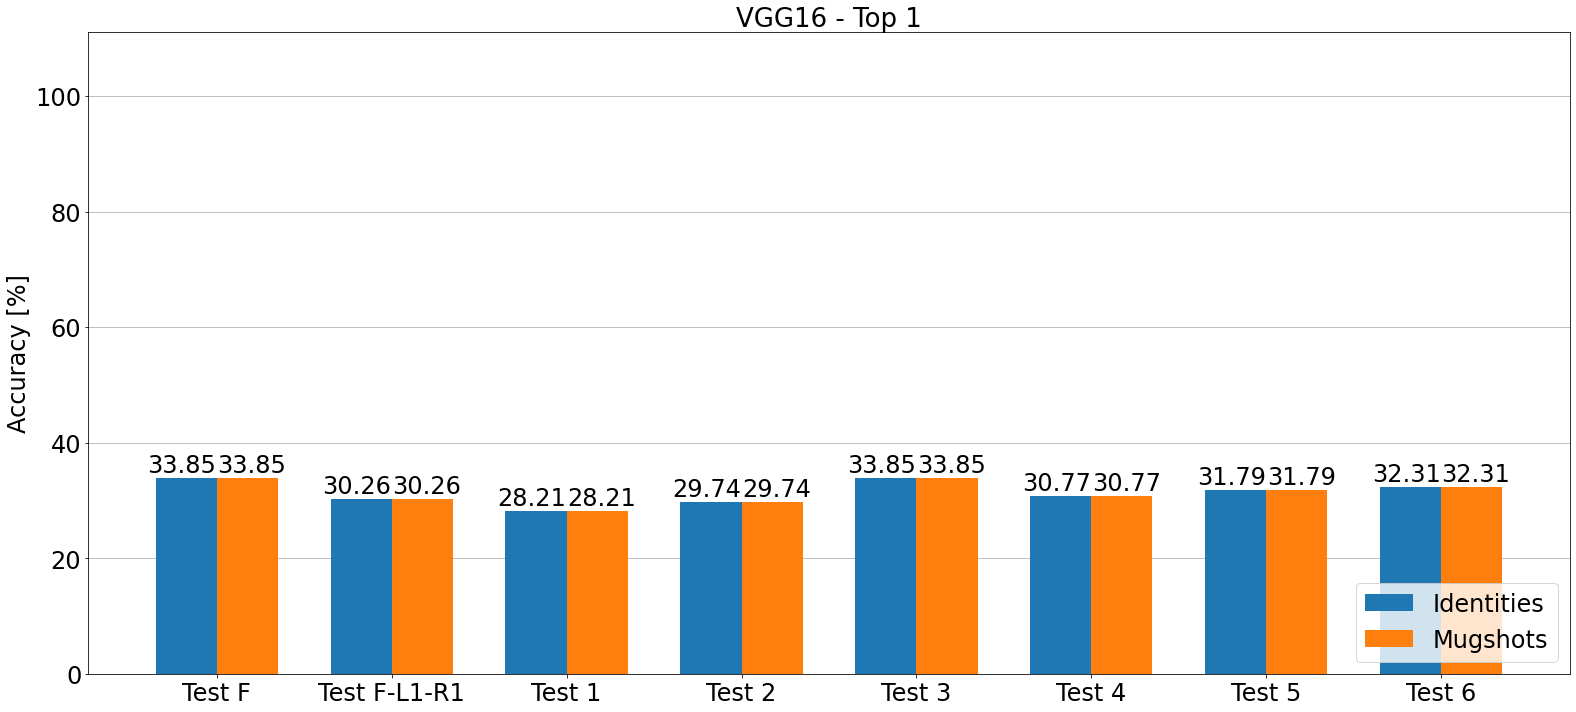

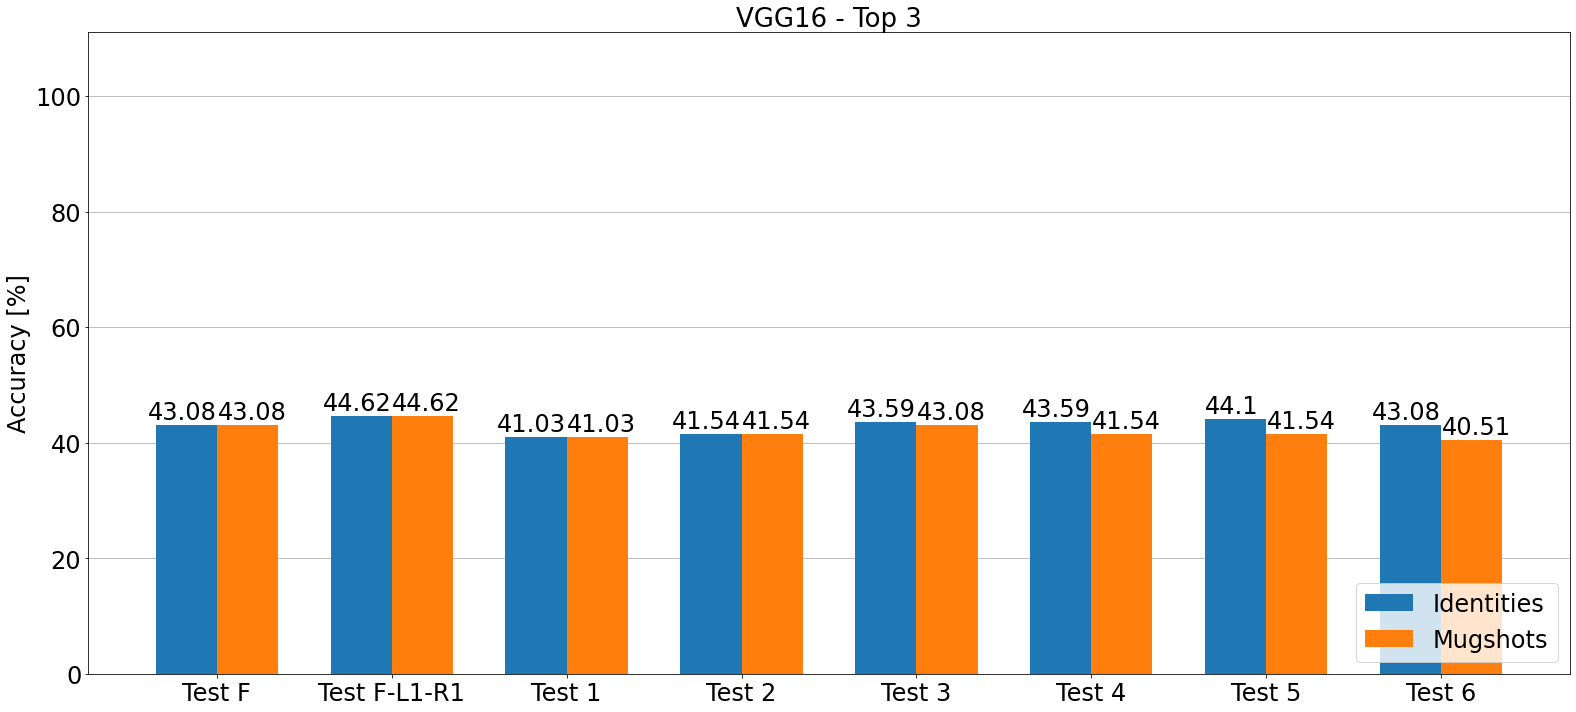

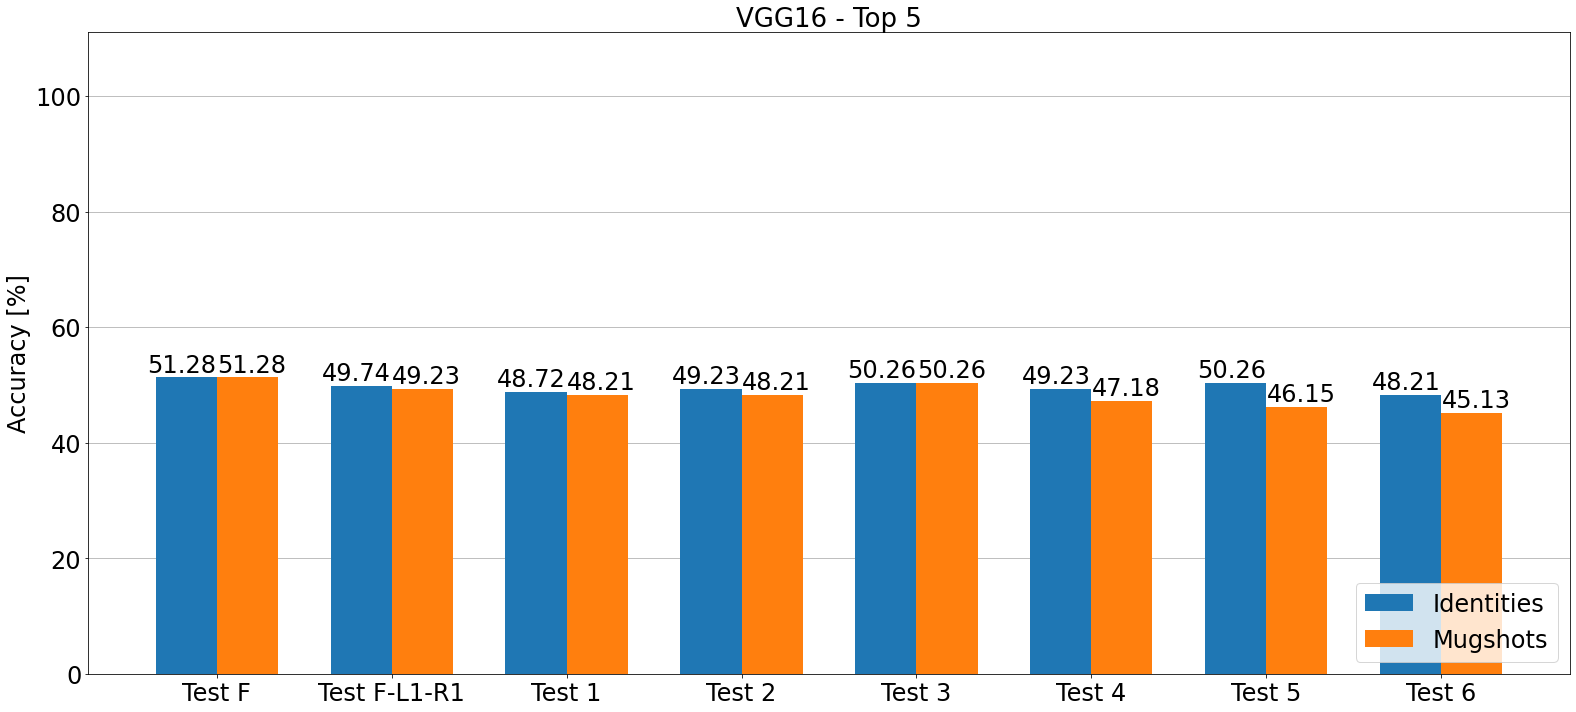

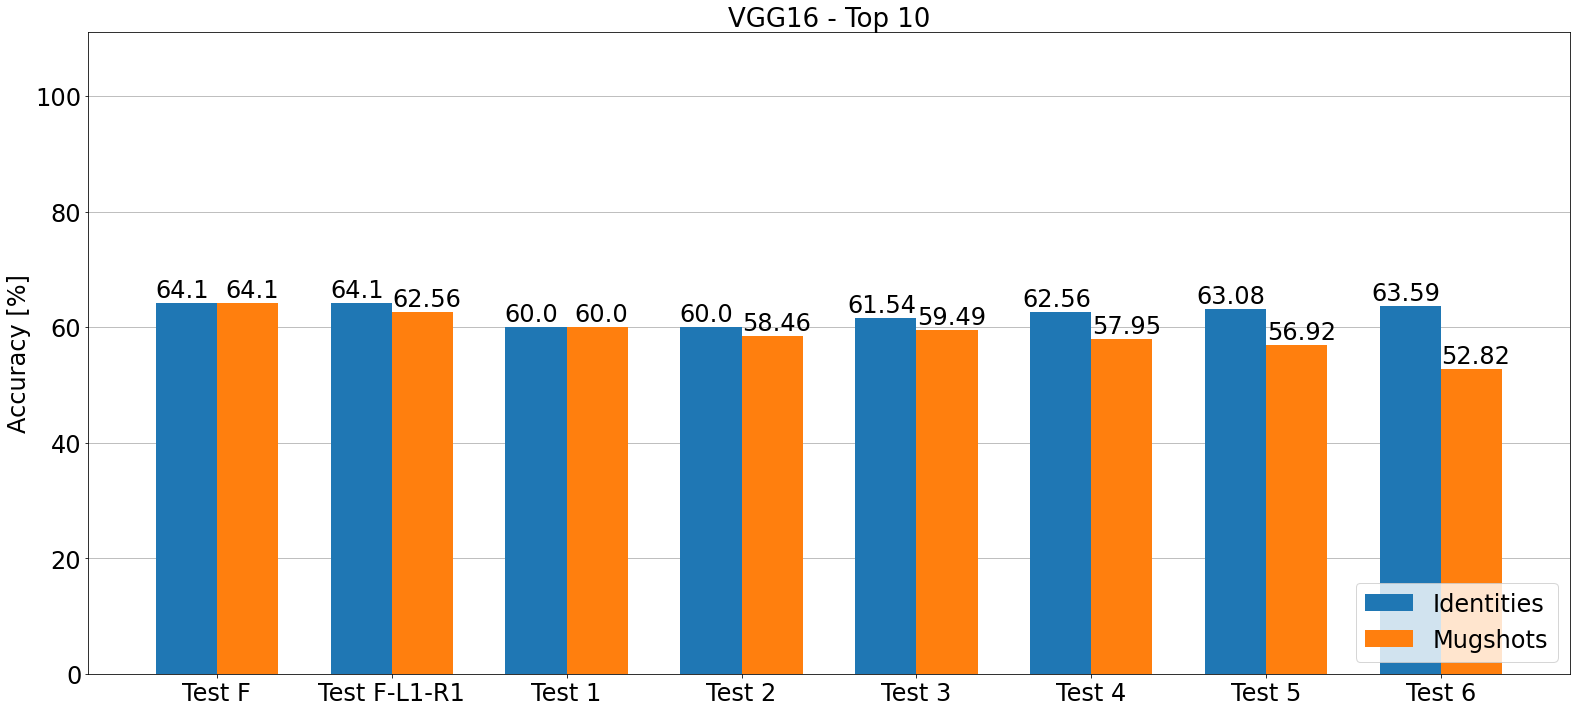

In [ ]:
# Computes the top-1, top-3, top-5, and top-10 test using ResNet50, VGG16 and SE-ResNet50
tops = [1, 3, 5, 10]
nnNames = ['resnet', 'vgg16', 'senet50']
#nnNames = ['vgg16']


for nn in nnNames:

  top_id_frontal, top_imgs_frontal = run_test('/content/embeddings-' + nn + '-photosignalling.npz',
          '/content/embeddings-' + nn + '-security.npz',
          True,
          tops,
          pose_combiner(['3'], ['3']),
          nn + ' Frontal test',
          True)

  top_id_F_L1_R1, top_imgs_F_L1_R1 = run_test('/content/embeddings-' + nn + '-photosignalling.npz',
          '/content/embeddings-' + nn + '-security.npz',
          True,
          tops,
          pose_combiner(['2', '3', '4'], ['3']),
          nn + ' F-L1-R1 test',
          True)

  top_id_F_R4, top_imgs_F_R4 = run_test('/content/embeddings-' + nn + '-photosignalling.npz',
          '/content/embeddings-' + nn + '-security.npz',
          True,
          tops,
          pose_combiner(['3', '5'], ['3']),
          nn + ' F-R4 test',
          True)

  top_id_2, top_imgs_2= run_test('/content/embeddings-' + nn + '-photosignalling.npz',
          '/content/embeddings-' + nn + '-security.npz',
          True,
          tops,
          pose_combiner(['1', '3', '5'], ['3']),
          nn + ' Test 2',
          True)

  top_id_3, top_imgs_3= run_test('/content/embeddings-' + nn + '-photosignalling.npz',
          '/content/embeddings-' + nn + '-security.npz',
          True,
          tops,
          pose_combiner(['1', '2', '3', '4', '5'], ['3']),
          nn + ' Test 3',
          True)

  top_id_4, top_imgs_4= run_test('/content/embeddings-' + nn + '-photosignalling.npz',
          '/content/embeddings-' + nn + '-security.npz',
          True,
          tops,
          pose_combiner(['0', '1', '2', '3', '4', '5', '6'], ['3']),
          nn + ' Test 4',
          True)

  top_id_5, top_imgs_5= run_test('/content/embeddings-' + nn + '-photosignalling.npz',
          '/content/embeddings-' + nn + '-security.npz',
          True,
          tops,
          pose_combiner(['0', '1', '2', '3', '4', '5', '6'], ['2', '3']),
          nn + ' Test 5',
          True)
  

  top_id_6, top_imgs_6= run_test('/content/embeddings-' + nn + '-photosignalling.npz',
        '/content/embeddings-' + nn + '-security.npz',
        True,
        tops,
        pose_combiner(['0', '1', '2', '3', '4', '5', '6'], ['1', '2', '3', '4']),
        nn + ' Test 6',
        True)

  

  labels = ['Test F', 'Test F-L1-R1', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6']

  for N in tops:
    titlePrefix = ''
    if nn == 'resnet':
      titlePrefix = 'ResNet50'
    elif nn == 'vgg16':
      titlePrefix = 'VGG16'
    else:
      titlePrefix = 'SeNet50'
    title = titlePrefix + ' - Top ' + str(N)
    filename = '/content/results/Top' + str(N) + '-' + titlePrefix + '.pdf'
    idbars = [ top_id_frontal[N], top_id_F_L1_R1[N], top_id_F_R4[N], top_id_2[N], top_id_3[N], top_id_4[N], top_id_5[N], top_id_6[N]]
    imgsbars = [ top_imgs_frontal[N], top_imgs_F_L1_R1[N], top_imgs_F_R4[N], top_imgs_2[N], top_imgs_3[N], top_imgs_4[N], top_imgs_5[N], top_imgs_6[N]]
    plot_histograms(idbars, imgsbars, 2, labels, title, filename)


In [ ]:
!cp -R /content/results /content/drive/MyDrive/ViolenceDetectionDatasets/